# Most Frequent Skills Required In Data Scientist Job Posts
Data Scientists and statisticians have recently become one of the [most fast growing jobs](https://www.cnbc.com/2019/09/07/these-are-the-10-fastest-growing-jobs-of-the-next-decade.html) in the last couple of years, due to the increasing value in utilizing big data. Many different companies across various of fields are seeking for data scientists in the job market. Out of curiosity, I want to know what are the most important skills that companies are looking for as data scientists. In this project, I created my own web scrapper and scraped the qualification information from 105 data scientist related job posts near Toronto, ON, Canada on Indeed.com.

## Key Findings:
- The most frequently mentioned programming languages are Python, SQL, and R. Among the three, Python is the most demanded language. 
- Machine learning and data mining skills are very important. 
- Knowledge and skills in statistics are also explicitly mentioned in many job posts.
- Many companies ask for candidates to have at least three years of working experience, likely in data analysis related fields.
- Besides the hard skills, being able to communicate well with data using presentation is also highly valued in data scientist jobs.

In [8]:
import time
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [15]:
pages = [0, 10, 20, 30, 40, 50, 60]
urls = []
driver = webdriver.Chrome(executable_path=r"E:\Chromedriver\chromedriver_win32\chromedriver.exe")
# Scrape URLs for job posts
for page in pages:
    driver.get("https://ca.indeed.com/jobs?q=Data+Scientist&l=Toronto,+ON&start={page}".format(page = page))
    time.sleep(2)
    content = driver.page_source
    soup = BeautifulSoup(content, 'html.parser')
    for h2_tag in soup.find_all("h2"):
        a_tag = h2_tag.find('a')
        base = 'https://ca.indeed.com/'
        link = a_tag.attrs['href']
        url = urljoin(base, link)
        urls.append(url)

In [16]:
# Create a dataframe for job info
job_info = {'title':[], 'requirement':[]}
for job in urls:
    response = requests.get(job)
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')
    # Find the title
    h3_tag = soup.find("h3")
    title = h3_tag.text
    # Find the lists of requirements
    ul_tag = soup.find_all('ul') # Most job posts have their requirements listed as bulletpoints
    requirement = ul_tag[1].text # Usually, the first list of bulletpoints are for responsibility, and the second list of bullet points are for qualification
    job_info['title'].append(title)
    job_info['requirement'].append(requirement)

In [17]:
df = pd.DataFrame(job_info)
df

,title,requirement
0,Data Scientist - Economist - Researcher,Manage multiple versions of a shareable study ...
1,Data Scientist,"\nMS or PhD in math, engineering, computer sci..."
2,Data Scientist,Making decisions about data architecture and d...
3,Data Scientist,\nHands on experience working with tools like ...
4,Applied AI Engineer/Data Scientist,"Python, Javascript, etc."
...,...,...
100,Data Scientist - Insights & Innovation,\n3+ years’ Data Science experience with exper...
101,Data Scientist,Experience retraining a model within a few day...
102,"Senior Data Scientist (Toronto), Intact Lab",Work on some very interesting problems as desc...
103,Data Scientist,"\nMasters or PHD in Mathematics, Statistics or..."


In [18]:
# Only titles specifically contains Data Scientist will be considered
df_data_scientist = df[df['title'].str.contains('Data Scientist')]

In [32]:
# Clean the data
stop_words = stopwords.words('english')
requirements = df_data_scientist['requirement']
requirements_token = requirements.str.replace(', ', ' ').str.replace('; ', ' ').str.replace('\n', ' ').str.replace('/', ' ').str.lower().str.split()
requirements_clean = requirements_token.apply(lambda x: [w for w in x if w not in stop_words])

In [33]:
# Find the most frequent words
unique_words = {}
for element in requirements_clean:
    for word in element:
        if word not in unique_words:
            unique_words[word] = 1
        else:
            unique_words[word] += 1

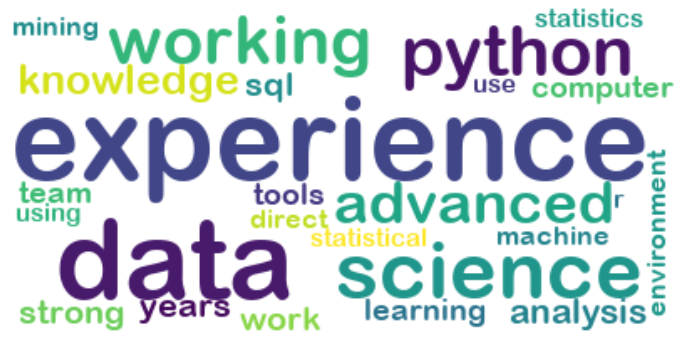

In [34]:
# Generate WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
def generate_wordcloud(text):
    wordcloud = WordCloud(font_path=r"C:\Windows\Fonts\ARLRDBD.TTF",
                          background_color ='white',
                          stopwords = None,
                          collocations=False,
                         max_words = 25).generate_from_frequencies(text)
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

generate_wordcloud(unique_words)

The word could above shows the top 25 frequently mentioned words in the qualification section of job posts. The size of the word indicates its frequency being mentioned. 

Three different computer languages can be seen from the word cloud - Python, SQL, and R. Within the three languages, Python is the most demanded language, and R is the least demanded language. Other common computer languages used in software development such as Java, Javascript, and C++ are not shown in the cloud, indicating that even though both fields require programming skills, their language requirements are different. 

One other important skill is statistics. It is intuitive as data scientists need to perform statistical analysis. 

Despite I can extract some useful skills from the word cloud above, most of the words do not represent a skill on its own. For example, the most frequently mentioned words are experience and data, which are not meaningful by themselves. What experience and what data the companies are asking for? To answer this question, I need to extract the combinations of two words. 

In [35]:
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
# Clean the data
requirements = df_data_scientist['requirement']
requirements_token = requirements.str.replace(', ', ' ').str.replace('; ', ' ').str.replace('\n', ' ').str.replace('/', ' ').str.lower().apply(word_tokenize)
requirements_clean = requirements_token.apply(lambda x: [w for w in x if w not in stop_words])
requirements_clean_bigrams = requirements_clean.apply(nltk.bigrams).apply(list)

In [37]:
# Find the most frequent two-word combinations
unique_bigrams = []
counts = []

for element in requirements_clean_bigrams:
    for bigrams in element:
        if bigrams not in unique_bigrams:
            unique_bigrams.append(bigrams)
for unique in unique_bigrams:
    count = 0
    for element in requirements_clean_bigrams:
        for bigrams in element:
            if bigrams == unique:
                count += 1
    counts.append((count, unique))
    
counts.sort()
counts.reverse()
i = 0
for i in range(25):
    count, word = counts[i]
    print ("%s: %d" %(word, count))

('data', 'science'): 56
('years', 'experience'): 28
('machine', 'learning'): 28
('etc', '.'): 28
('data', 'mining'): 28
('computer', 'science'): 28
('3+', 'years'): 28
('years', '’'): 21
('working', 'knowledge'): 21
('python', 'r'): 21
('intermediate', 'advanced'): 21
(';', 'ability'): 21
('services', 'experience'): 14
('science', 'experience'): 14
('r', 'python'): 14
('proficient', 'python'): 14
('presentation', 'skills'): 14
('one', 'day'): 14
('model', 'within'): 14
('manipulating', 'data'): 14
('least', '1'): 14
('large', 'data'): 14
('language', '('): 14
('knowledge', 'python'): 14
('financial', 'services'): 14


The list above answers my question very well. The most frequent words, "data" and "experience", represent data science and 3+ years of experience. It means that for many of the data scientist jobs, the companies require the candidates to have at least 3 years of previous working experience, likely in a data analysis related field. Other highly frequent combinations are machine learning, data mining, and manipulating data. Interestingly, besides the hard skills, many companies also look for presentation skills. Therefore, data scientists are not "nerdy jobs", and the ability to convey your findings efficiently is also important.